In [1]:
import torch
import torch.nn as nn

### Create Convulation Layer

In [ ]:
# Convulation Layer
nn.Conv2d(...) # input usually consists of width, height and depth(channels amount)
# input tensor shape looks like this -> (batch_size, Channels, Height, Width)
nn.Conv2d(in_channels, out_channels, (kernel_h, kernel_w), stride=(1, 1), padding=(0, 0), bias=False)
# convulation layer consists of convolution kernels modules(here we have (3, 3))
# amount of kernels is amount of color channels(this is a different kernels, not copy of one!)
# and also with kernels in convolution layer we have bias - bias is only one
# goal of convulation network training is to find param's on convulational filters
# (in every epoch we show new "piece" of image to our network)
# with this filter we go throw all image, in output layer result of every filter is summing 
# and do the same for every filter for each channel
# channels setup filters amount
# stride - this is bias - it tell us how we move sliding window
# padding - adding "padding" layer for capture all image areas

### Calc output layers size

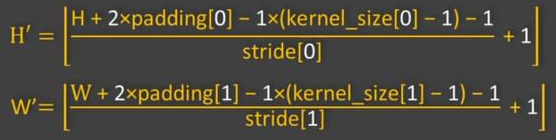

### Calc training parameters amount

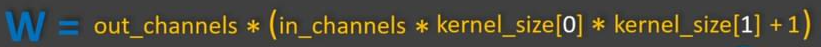

### Create Convolution networks

In [2]:
# in this case we watch only on channels amount
model = nn.Sequential(
    nn.Conv2d(3, 32, (3, 3)),
    nn.ReLU(),
    nn.Conv2d(32, 64, (3, 3))
)

model

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU()
  (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
)

In [4]:
# one more way
model = nn.Sequential()
model.add_module('layer_1', nn.Conv2d(3, 32, (3, 3)))
model.add_module('relu', nn.ReLU())
model.add_module('layer_2', nn.Conv2d(32, 64, (3, 3)))

model

Sequential(
  (layer_1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu): ReLU()
  (layer_2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
)

In [5]:
# check output
input = torch.rand([16, 3, 28, 28], dtype=torch.float32)

out = model(input)
out.shape

torch.Size([16, 64, 24, 24])

In [6]:
# consist kernels of all input layers
model.state_dict()['layer_1.weight'].shape

torch.Size([32, 3, 3, 3])

In [7]:
# more difficult way
class MyModel(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv_1 = nn.Conv2d(in_channels, 32, (3, 3))
        self.conv_2 = nn.Conv2d(32, out_channels, (3, 3))
        self.act = nn.ReLU()

    def forward(self, x):
        x = self.conv_1(x)
        x = self.act(x)
        out = self.conv_2(x)
        
        return out


model = MyModel(3, 64)
model

MyModel(
  (conv_1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv_2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (act): ReLU()
)

In [8]:
# check
input = torch.rand([16, 3, 50, 50], dtype=torch.float32)

out = model(input)
out.shape

torch.Size([16, 64, 46, 46])

### Modify tensor before pass in/from convolution layer

In [10]:
# before pass tensor into linear layer we must modify it to a one dimentional tensor
tensor = torch.randn([2, 1, 3, 3], dtype=torch.float32)
tensor

tensor([[[[ 0.6040, -1.0039,  1.7820],
          [ 0.0029,  0.3511,  0.0888],
          [ 0.9054,  0.8246, -1.3618]]],


        [[[ 2.7276, -0.2856, -1.1695],
          [ 0.6368, -0.7709,  0.0972],
          [-1.2223,  1.9153, -2.0965]]]])

In [11]:
conv = nn.Conv2d(1, 3, (3, 3))(tensor)
print(conv.shape)
print(conv)

torch.Size([2, 3, 1, 1])
tensor([[[[ 0.0221]],

         [[ 0.0727]],

         [[-0.4515]]],


        [[[-2.0651]],

         [[ 1.1231]],

         [[-0.6298]]]], grad_fn=<ConvolutionBackward0>)


In [12]:
tensor = tensor.reshape([2, -1])
print(tensor.shape)
print(tensor) # this tensor we can put into linear layer

torch.Size([2, 9])
tensor([[ 0.6040, -1.0039,  1.7820,  0.0029,  0.3511,  0.0888,  0.9054,  0.8246,
         -1.3618],
        [ 2.7276, -0.2856, -1.1695,  0.6368, -0.7709,  0.0972, -1.2223,  1.9153,
         -2.0965]])


In [13]:
linear = nn.Linear(9, 10)(tensor)
print(linear.shape)
print(linear)

torch.Size([2, 10])
tensor([[ 0.1285,  0.6042,  0.6333, -0.2493,  0.0533,  0.0438,  1.0667, -0.4930,
          0.6929, -0.8010],
        [ 0.3333,  1.2975, -0.2609, -1.1624,  0.1629, -0.5860,  1.0381, -0.0220,
          0.2695, -0.3119]], grad_fn=<AddmmBackward0>)


In [14]:
# one more way to modify tensor
tensor = torch.randn([2, 1, 3, 3], dtype=torch.float32)
tensor

tensor([[[[-0.6294, -0.2884,  0.5748],
          [ 1.4587,  0.1610, -1.0660],
          [-0.1229,  0.1090,  0.1811]]],


        [[[ 0.8332, -1.9945,  1.4596],
          [ 0.3195,  0.5817,  0.2187],
          [-0.4895, -0.4140, -1.0290]]]])

In [15]:
flat = tensor.flatten(start_dim=1, end_dim=-1)
# or
# flat = nn.Flatten()(tensor)

print(flat.shape)
print(flat)

torch.Size([2, 9])
tensor([[-0.6294, -0.2884,  0.5748,  1.4587,  0.1610, -1.0660, -0.1229,  0.1090,
          0.1811],
        [ 0.8332, -1.9945,  1.4596,  0.3195,  0.5817,  0.2187, -0.4895, -0.4140,
         -1.0290]])


### Create NN

In [16]:
class MyModel(nn.Module):
    def __init__(self, out):
        super().__init__()
        self.conv_1 = nn.Conv2d(3, 32, (3, 3))
        self.conv_2 = nn.Conv2d(32, 64, (3, 3))

        # for vector modifying
        self.flatten = nn.Flatten()

        self.act = nn.ReLU()

        self.layer_1 = nn.Linear(64 * 24 * 24, 128)
        self.layer_2 = nn.Linear(128, out)

    def forward(self, x):
        x = self.conv_1(x)
        x = self.act(x)
        x = self.conv_2(x)

        x = self.flatten(x)

        x = self.layer_1(x)
        x = self.act(x)
        out = self.layer_2(x)
        return out

In [17]:
model = MyModel(10)
model

MyModel(
  (conv_1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv_2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (act): ReLU()
  (layer_1): Linear(in_features=36864, out_features=128, bias=True)
  (layer_2): Linear(in_features=128, out_features=10, bias=True)
)

In [18]:
# check
input = torch.rand([16, 3, 28, 28], dtype=torch.float32)

out = model(input)
out.shape

torch.Size([16, 10])

### Create more difficult model

In [19]:
class MyModel(nn.Module):
    def __init__(self, in_channels, out):
        super().__init__()
        # this model consists of another models
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, 32, (3, 3), bias=False),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 64, (3, 3), bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )

        self.flatten = nn.Flatten()
        # linear layer(fully-connected)
        self.fc = nn.Sequential(
            nn.Linear(64 * 24 * 24, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, out)
        )

    def forward(self, x):
        x = self.conv(x)
        x = self.flatten(x)
        out = self.fc(x)
        return out

In [20]:
model = MyModel(3, 10)
model

MyModel(
  (conv): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Sequential(
    (0): Linear(in_features=36864, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)